In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder





# 2-Axis Blog code implementation

In [2]:
datasetIndex = 6

if datasetIndex == 1:
    dataSetPath = r"..\1_DataSets\life_insurance_data.csv"
elif datasetIndex == 2:
    dataSetPath = r"..\1_DataSets\googleplaystore.csv"
elif datasetIndex == 3:
    dataSetPath = r"..\1_DataSets\framingham_Heart_Disease_Dataset.csv"
elif datasetIndex == 4:
    dataSetPath = r"..\1_DataSets\iris.csv"
elif datasetIndex == 5:
    dataSetPath = r"..\1_DataSets\2_cleveland.csv"
elif datasetIndex == 6:
    dataSetPath = r"..\1_DataSets\gdp_data_for_2AxisPlot.csv"

dataSetName = os.path.basename(dataSetPath)

dataset = pd.read_csv(dataSetPath)
dataset.head()

print(f"{dataSetName} Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"{dataSetName} Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in {dataSetName} File: {totalNumberOfRowInActualDataset}")

gdp_data_for_2AxisPlot.csv Columns: ['Date', 'GDP per capita', 'Annual Growth Rate (%)']
****************************
gdp_data_for_2AxisPlot.csv Shape: (200, 3)
****************************
Total Rows in gdp_data_for_2AxisPlot.csv File: 200


In [3]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

Dataset Shape after removing duplcates: (200, 3)
****************************
Remaining Rows in Dataset: 200
****************************
Total Duplicates: 0


In [4]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Remaining Rows in Dataset: 200
****************************
Removed Number of rows containing Null Values: 0


In [5]:
 # Encode the target column if it's categorical
labelEncodingAlgorithmFromScienceKit = LabelEncoder()

for col in cleanedDataset.select_dtypes(include=['object', 'category', 'bool', 'datetime']).columns:
    cleanedDataset[col] = cleanedDataset[col].str.lower()
    cleanedDataset[col] = cleanedDataset[col].str.strip()
    cleanedDataset[col] = labelEncodingAlgorithmFromScienceKit.fit_transform(cleanedDataset[col])
 

cleanedDataset.shape

cleanedDataset.head()




,Date,GDP per capita,Annual Growth Rate (%)
0,1900,1193.524658,2.494222
1,1901,1669.374668,-1.411020
2,1902,2038.051700,-0.868599
3,1903,2341.394357,4.289879
4,1904,2427.843491,2.245003


In [6]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    200 non-null    int64  
 1   GDP per capita          200 non-null    float64
 2   Annual Growth Rate (%)  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [7]:
cleanedDataset.describe()

,Date,GDP per capita,Annual Growth Rate (%)
count,200.000000,200.000000,200.000000
mean,1999.500000,25297.372826,1.530626
std,57.879185,14158.291376,2.051008
min,1900.000000,1193.524658,-1.964569
25%,1949.750000,12788.958008,-0.169762
50%,1999.500000,25051.556576,1.791479
75%,2049.250000,37370.966971,3.195395
max,2099.000000,50432.610860,4.933536


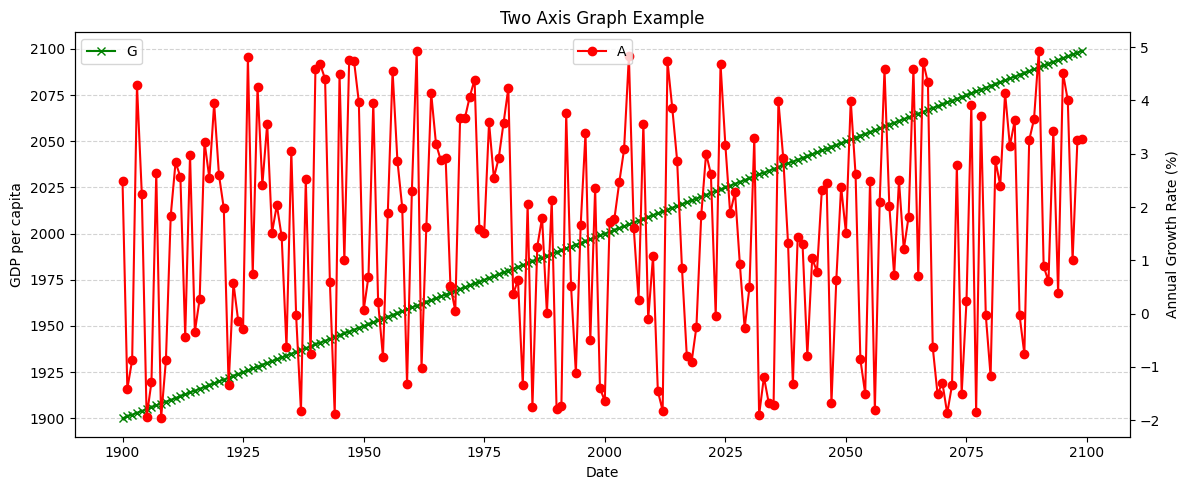

In [8]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 1
thirdFeatureIndex = 2


fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.set_title('Two Axis Graph Example')
ax.set_xlabel(cleanedDataset.columns.to_list()[firstFeatureIndex])
ax.plot(cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], color='green', marker='x')
ax2.plot(cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], cleanedDataset[cleanedDataset.columns.to_list()[thirdFeatureIndex]], color='red', marker='o')
ax.set_ylabel(cleanedDataset.columns.to_list()[secondFeatureIndex])
ax2.set_ylabel(cleanedDataset.columns.to_list()[thirdFeatureIndex])

ax.legend(cleanedDataset.columns.to_list()[secondFeatureIndex])
ax2.legend(cleanedDataset.columns.to_list()[thirdFeatureIndex], loc='upper center')

ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()